In [1]:
filepath = '../contracts_input.csv'

import pandas as pd
import numpy as np

import re

df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,조_항목,항목,원본,조항구분,파일명
0,0,목적 및 대상,1조 1항,본 계약은 음식물류 폐기물의 자원화를 효율적으로 추진하기 위하여 필요한 사항을 약정...,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
1,1,목적 및 대상,1조 2항,위탁처리대상은 [지역명1]군에서 분리 수거한 음식물류폐기물로 한다.,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
2,2,위탁업무의 내용 및 처리방법,2조 1항,"음식물폐기물의 수집․운반은 “갑”이하고 수집,운반된 음식물류 폐기물의 처리는 “을”...",NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
3,3,위탁업무의 내용 및 처리방법,2조 2항,"“을”은 “갑”이 수집,운반한 음식물류폐기물을 사업장에서 관련 법령에 적법하게 ...",NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
4,4,계약기간,3조 1항,위수탁기간은 [기간]로 한다.,['\xa0필수조항1'],체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx


In [2]:
len(df['조항구분'].unique())

426

In [3]:
df['조항구분'].unique()

array([nan, "['\\xa0필수조항1']", "['\\xa0옵션조항3']", "['필수조항8']",
       "['\\xa0옵션조항7']", "['필수조항10 유사조항']", "['필수조항11']", "['필수조항1']",
       "['\\xa0필수조항3', '\\xa0옵션조항1']", "['\\xa0옵션조항2']", "['\\xa0필수조항4']",
       "['\\xa0필수조항9']", "['\\xa0필수조항6']", "['\\xa0필수조항12']", "['필수조항3']",
       "['필수조항8', 'nan']", "['필수조항2']", "['필수조항4']", "['옵션조항2', 'nan']",
       "['옵션조항3']", "['필수조항7']", "['옵션조항2', '옵션조항3']", "['필수조항6']",
       "['필수조항12']", "['필수조항13']", "['필수조항5', '옵션조항2', 'nan']",
       "['필수조항5', 'nan']", "['필수조항5']", "['필수조항10.1 유사조항']", "['옵션조항10']",
       "['필수조항12', 'nan']", "['필수조항9']", "['옵션조항6']",
       "['필수조항5', '옵션조항2', '필수조항12']", "['옵션조항2', '필수조항10.1']",
       "['필수조항10.1']", "['옵션조항5']", "['옵션조항5', '옵션조항2']", "['옵션조항8']",
       "['옵션조항2']", "['옵션조항1']", "['필수조항5', '필수조항6', 'nan']",
       "['옵션조항2', '필수조항10.1', 'nan']", "['옵션조항2', '필수조항12', '필수조항4']",
       "['필수조항7', '필수조항10.1 유사조항']", "['옵션조항2', '필수조항9']", "['옵션조항7']",
       "['옵션조항2', '필수조항12', 'nan']", "['필수조항

In [4]:
label = "['필수조항1', '필수조항9', '필수조항2', 'nan']"
label = label[1:-1]
print(label)

import re

label = re.sub("'", '', label)
label_list = label.split(',')
label_list = [x.strip() for x in label_list]

label_list = [re.sub(r"\\xa0", '', label) for label in label_list]
print(label_list)
label_list

'필수조항1', '필수조항9', '필수조항2', 'nan'
['필수조항1', '필수조항9', '필수조항2', 'nan']


['필수조항1', '필수조항9', '필수조항2', 'nan']

In [5]:
key_list = ['필수조항1', '필수조항2', '필수조항3', '필수조항4', '필수조항5', '필수조항6', '필수조항7',
       '필수조항8', '필수조항9', '필수조항10', '필수조항10 유사조항', '필수조항10.1', '필수조항10.1 유사조항', 
    '필수조항11', '필수조항12', '필수조항13', '옵션조항1', '옵션조항2', '옵션조항3', '옵션조항4', '옵션조항5', 
            '옵션조항6', '옵션조항7', '옵션조항8', '옵션조항9', '옵션조항10', '옵션조항12']

key_priority = {k:v for k, v in zip(key_list, range(len(key_list)))}
key_priority


{'필수조항1': 0,
 '필수조항2': 1,
 '필수조항3': 2,
 '필수조항4': 3,
 '필수조항5': 4,
 '필수조항6': 5,
 '필수조항7': 6,
 '필수조항8': 7,
 '필수조항9': 8,
 '필수조항10': 9,
 '필수조항10 유사조항': 10,
 '필수조항10.1': 11,
 '필수조항10.1 유사조항': 12,
 '필수조항11': 13,
 '필수조항12': 14,
 '필수조항13': 15,
 '옵션조항1': 16,
 '옵션조항2': 17,
 '옵션조항3': 18,
 '옵션조항4': 19,
 '옵션조항5': 20,
 '옵션조항6': 21,
 '옵션조항7': 22,
 '옵션조항8': 23,
 '옵션조항9': 24,
 '옵션조항10': 25,
 '옵션조항12': 26}

In [6]:
import re

def transform_label(label):
    if str(label) == 'nan':
        return 'nan'
    else:
        # '[', ']' 제외
        label = label[1:-1]
        label = re.sub("'", '', label)
        label_list = label.split(',')
        label_list = [label.strip() for label in label_list]
        label_list = [re.sub(r"\\xa0", '', label) for label in label_list]
        # cleaning
        new_list = []
        for label in label_list:
            if label == '필수조항17':
                new_list.append('필수조항7')
            elif label == '팔수조항11':
                new_list.append('필수조항11')
            elif label == '필수정보6':
                new_list.append('필수조항6')
            elif label == '' or label == '조항구분' or label == 'nan':
                pass
            elif label == '필수조11':
                new_list.append('필수조항11')
            elif label == '필수조항101 유사조항':
                new_list.append('필수조항10.1 유사조항')
            elif label[0] == ' ':
                new_list.append(label[1:])
            else:
                new_list.append(label)
        new_list.sort(key=lambda x: key_priority[x])
        return str(new_list) if new_list else 'nan'

In [7]:
transform_label("['필수조항1', '필수조항9', '필수조항2', 'nan']")

"['필수조항1', '필수조항2', '필수조항9']"

In [8]:
df['조항구분'] = df['조항구분'].apply(transform_label)

df['조항구분'].unique()

array(['nan', "['필수조항1']", "['옵션조항3']", "['필수조항8']", "['옵션조항7']",
       "['필수조항10 유사조항']", "['필수조항11']", "['필수조항3', '옵션조항1']", "['옵션조항2']",
       "['필수조항4']", "['필수조항9']", "['필수조항6']", "['필수조항12']", "['필수조항3']",
       "['필수조항2']", "['필수조항7']", "['옵션조항2', '옵션조항3']", "['필수조항13']",
       "['필수조항5', '옵션조항2']", "['필수조항5']", "['필수조항10.1 유사조항']",
       "['옵션조항10']", "['옵션조항6']", "['필수조항5', '필수조항12', '옵션조항2']",
       "['필수조항10.1', '옵션조항2']", "['필수조항10.1']", "['옵션조항5']",
       "['옵션조항2', '옵션조항5']", "['옵션조항8']", "['옵션조항1']",
       "['필수조항5', '필수조항6']", "['필수조항4', '필수조항12', '옵션조항2']",
       "['필수조항7', '필수조항10.1 유사조항']", "['필수조항9', '옵션조항2']",
       "['필수조항12', '옵션조항2']", "['필수조항7', '옵션조항2']",
       "['필수조항7', '필수조항11', '옵션조항2']", "['필수조항6', '옵션조항2']", "['필수조항10']",
       "['필수조항10.1', '옵션조항2', '옵션조항3']", "['필수조항10.1', '옵션조항3']",
       "['필수조항4', '옵션조항2', '옵션조항5']", "['필수조항5', '필수조항6', '옵션조항2']",
       "['필수조항5', '필수조항6', '필수조항7']", "['필수조항11', '옵션조항8']",
       "['필수조항13', '옵션조항2']",

In [9]:
len(df['조항구분'].unique())

284

In [10]:
df

,Unnamed: 0,조_항목,항목,원본,조항구분,파일명
0,0,목적 및 대상,1조 1항,본 계약은 음식물류 폐기물의 자원화를 효율적으로 추진하기 위하여 필요한 사항을 약정...,nan,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
1,1,목적 및 대상,1조 2항,위탁처리대상은 [지역명1]군에서 분리 수거한 음식물류폐기물로 한다.,nan,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
2,2,위탁업무의 내용 및 처리방법,2조 1항,"음식물폐기물의 수집․운반은 “갑”이하고 수집,운반된 음식물류 폐기물의 처리는 “을”...",nan,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
3,3,위탁업무의 내용 및 처리방법,2조 2항,"“을”은 “갑”이 수집,운반한 음식물류폐기물을 사업장에서 관련 법령에 적법하게 ...",nan,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
4,4,계약기간,3조 1항,위수탁기간은 [기간]로 한다.,['필수조항1'],체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
...,...,...,...,...,...,...
37118,37118,계약보증금,10조 1항,본 계약은 일반적으로 공정·타당하다고 인정되는 계약의 관습에 따라 계약보증금 징수가...,['옵션조항1'],체크889. 프리랜서용역위탁 표준계약서_2019.01.xlsx
37119,37119,계약보증금,10조 2항,채무불이행 사유 등 계약이행에 관한 현저한 위험이 발생할 경우 각 당사자는 위험을 ...,['옵션조항1'],체크889. 프리랜서용역위탁 표준계약서_2019.01.xlsx
37120,37120,청렴의무 및 위반 시 제한,11조 1항,‘을’은 계약체결 및 이행과 관련하여 어떠한 명분으로도 ‘갑’의 관계직원에게 직·간...,['필수조항11'],체크889. 프리랜서용역위탁 표준계약서_2019.01.xlsx
37121,37121,신의성실 등,12조 1항,"‘을’은 독립된 자유직업소득자로서 사업자등록을 하여야 하며, ‘갑’의 명예를 훼손함...",nan,체크889. 프리랜서용역위탁 표준계약서_2019.01.xlsx


In [11]:
df.to_csv('./new_result/data_input_210712.csv')

In [12]:
label_dict = dict()

for i in range(len(df)):
    label = df.loc[i]['조항구분']
    if str(label) != 'nan':
        label = label[1:-1]
        label = re.sub("'", '', label)
        label_list = label.split(',')
        label_list = [label.strip() for label in label_list] 
        for label in label_list:
            if label not in label_dict:
                label_dict[label] = 1
            else:
                label_dict[label] += 1

In [13]:
label_dict

{'필수조항1': 880,
 '옵션조항3': 2185,
 '필수조항8': 1034,
 '옵션조항7': 178,
 '필수조항10 유사조항': 247,
 '필수조항11': 2725,
 '필수조항3': 795,
 '옵션조항1': 1116,
 '옵션조항2': 538,
 '필수조항4': 896,
 '필수조항9': 924,
 '필수조항6': 1088,
 '필수조항12': 1562,
 '필수조항2': 162,
 '필수조항7': 864,
 '필수조항13': 263,
 '필수조항5': 870,
 '필수조항10.1 유사조항': 164,
 '옵션조항10': 23,
 '옵션조항6': 97,
 '필수조항10.1': 302,
 '옵션조항5': 185,
 '옵션조항8': 536,
 '필수조항10': 227,
 '옵션조항12': 1,
 '옵션조항9': 1,
 '옵션조항4': 5}

In [14]:
ordered_label_dict = {k: v for k, v in sorted(label_dict.items(), key=lambda x: key_priority[x[0]])}
ordered_label_dict

{'필수조항1': 880,
 '필수조항2': 162,
 '필수조항3': 795,
 '필수조항4': 896,
 '필수조항5': 870,
 '필수조항6': 1088,
 '필수조항7': 864,
 '필수조항8': 1034,
 '필수조항9': 924,
 '필수조항10': 227,
 '필수조항10 유사조항': 247,
 '필수조항10.1': 302,
 '필수조항10.1 유사조항': 164,
 '필수조항11': 2725,
 '필수조항12': 1562,
 '필수조항13': 263,
 '옵션조항1': 1116,
 '옵션조항2': 538,
 '옵션조항3': 2185,
 '옵션조항4': 5,
 '옵션조항5': 185,
 '옵션조항6': 97,
 '옵션조항7': 178,
 '옵션조항8': 536,
 '옵션조항9': 1,
 '옵션조항10': 23,
 '옵션조항12': 1}

In [15]:
ordered_label_dict.values()

dict_values([880, 162, 795, 896, 870, 1088, 864, 1034, 924, 227, 247, 302, 164, 2725, 1562, 263, 1116, 538, 2185, 5, 185, 97, 178, 536, 1, 23, 1])

In [16]:
matrix_df = pd.DataFrame(index=key_list, columns=key_list)
matrix_df.fillna(0, inplace=True)
matrix_df

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,...,옵션조항2,옵션조항3,옵션조항4,옵션조항5,옵션조항6,옵션조항7,옵션조항8,옵션조항9,옵션조항10,옵션조항12
필수조항1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
필수조항10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from itertools import permutations

for i in range(len(df)):
    if df.loc[i]['조항구분'] != 'nan':
        label = df.loc[i]['조항구분'][1:-1]
        label = re.sub("'", '', label)
        label_list = label.split(',')
        label_list = [x.strip() for x in label_list]
        # 단일로 나타난 경우
        if len(label_list) == 1:
            matrix_df[label][label] += 1
        else:
            permute = list(permutations(label_list,2))
            for option_1, option_2 in permute:
                matrix_df[option_1][option_2] += 1

matrix_df

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,...,옵션조항2,옵션조항3,옵션조항4,옵션조항5,옵션조항6,옵션조항7,옵션조항8,옵션조항9,옵션조항10,옵션조항12
필수조항1,640,13,29,3,1,14,12,27,3,3,...,8,108,1,2,0,1,8,0,0,0
필수조항2,13,125,7,4,1,0,3,12,5,0,...,0,8,0,0,0,0,0,0,0,0
필수조항3,29,7,620,2,0,2,3,135,3,4,...,2,33,1,0,0,0,0,0,0,0
필수조항4,3,4,2,833,2,2,17,3,3,2,...,28,9,0,3,0,2,0,0,0,0
필수조항5,1,1,0,2,765,22,9,2,0,7,...,46,0,0,0,0,2,1,0,0,0
필수조항6,14,0,2,2,22,980,12,6,0,5,...,7,7,0,0,0,9,3,0,0,0
필수조항7,12,3,3,17,9,12,785,6,1,5,...,27,7,0,0,0,1,1,0,0,0
필수조항8,27,12,135,3,2,6,6,850,4,6,...,5,29,1,0,0,1,0,0,0,0
필수조항9,3,5,3,3,0,0,1,4,901,1,...,4,2,0,0,0,0,0,0,0,0
필수조항10,3,0,4,2,7,5,5,6,1,172,...,0,5,0,0,0,0,0,0,0,0


In [18]:
matrix_df.to_csv('./new_result/multi_label_distribution_210713.csv')

In [20]:
prob_matrix = matrix_df.apply(lambda x: x / sum(x), axis=1)
prob_matrix

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,...,옵션조항2,옵션조항3,옵션조항4,옵션조항5,옵션조항6,옵션조항7,옵션조항8,옵션조항9,옵션조항10,옵션조항12
필수조항1,0.636816,0.012935,0.028856,0.002985,0.000995,0.013930,0.011940,0.026866,0.002985,0.002985,...,0.007960,0.107463,0.000995,0.001990,0.000000,0.000995,0.007960,0.0,0.0,0.0
필수조항2,0.071429,0.686813,0.038462,0.021978,0.005495,0.000000,0.016484,0.065934,0.027473,0.000000,...,0.000000,0.043956,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
필수조항3,0.033721,0.008140,0.720930,0.002326,0.000000,0.002326,0.003488,0.156977,0.003488,0.004651,...,0.002326,0.038372,0.001163,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
필수조항4,0.003212,0.004283,0.002141,0.891863,0.002141,0.002141,0.018201,0.003212,0.003212,0.002141,...,0.029979,0.009636,0.000000,0.003212,0.000000,0.002141,0.000000,0.0,0.0,0.0
필수조항5,0.001085,0.001085,0.000000,0.002169,0.829718,0.023861,0.009761,0.002169,0.000000,0.007592,...,0.049892,0.000000,0.000000,0.000000,0.000000,0.002169,0.001085,0.0,0.0,0.0
필수조항6,0.012195,0.000000,0.001742,0.001742,0.019164,0.853659,0.010453,0.005226,0.000000,0.004355,...,0.006098,0.006098,0.000000,0.000000,0.000000,0.007840,0.002613,0.0,0.0,0.0
필수조항7,0.013015,0.003254,0.003254,0.018438,0.009761,0.013015,0.851410,0.006508,0.001085,0.005423,...,0.029284,0.007592,0.000000,0.000000,0.000000,0.001085,0.001085,0.0,0.0,0.0
필수조항8,0.024215,0.010762,0.121076,0.002691,0.001794,0.005381,0.005381,0.762332,0.003587,0.005381,...,0.004484,0.026009,0.000897,0.000000,0.000000,0.000897,0.000000,0.0,0.0,0.0
필수조항9,0.003215,0.005359,0.003215,0.003215,0.000000,0.000000,0.001072,0.004287,0.965702,0.001072,...,0.004287,0.002144,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
필수조항10,0.010949,0.000000,0.014599,0.007299,0.025547,0.018248,0.018248,0.021898,0.003650,0.627737,...,0.000000,0.018248,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


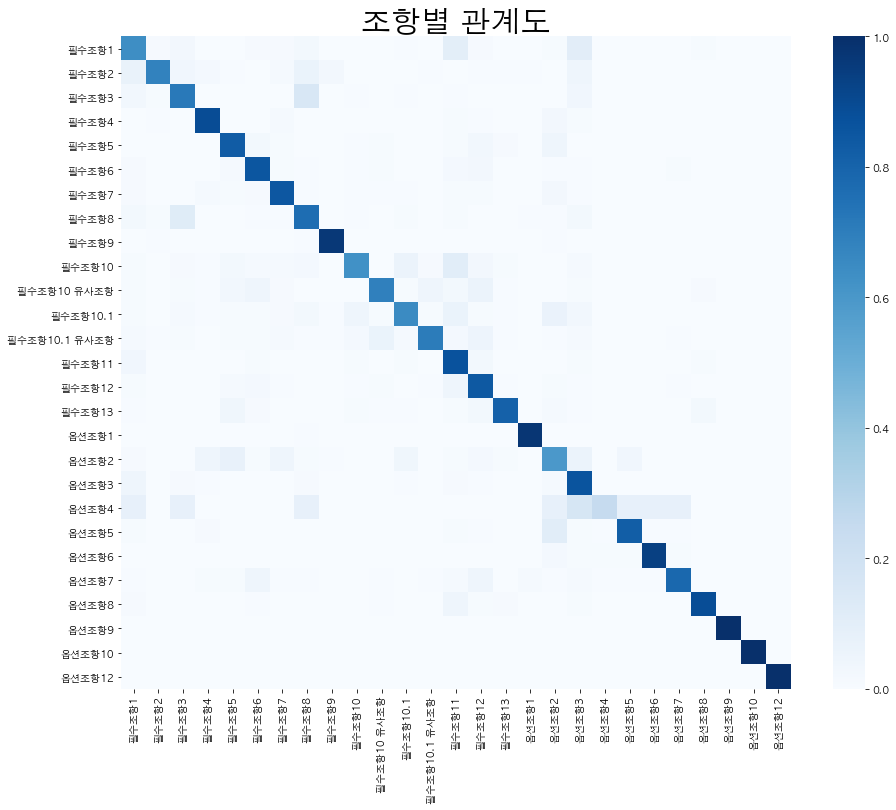

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 12))
ax = sns.heatmap(prob_matrix, cmap='Blues')

plt.title('조항별 관계도', fontsize=30)

plt.show()

In [22]:
matrix_df['중복된 조항별 합계'] = matrix_df.sum(axis=1)
matrix_df['조항별 총계'] = ordered_label_dict.values()
matrix_df

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,...,옵션조항4,옵션조항5,옵션조항6,옵션조항7,옵션조항8,옵션조항9,옵션조항10,옵션조항12,중복된 조항별 합계,조항별 총계
필수조항1,640,13,29,3,1,14,12,27,3,3,...,1,2,0,1,8,0,0,0,1005,880
필수조항2,13,125,7,4,1,0,3,12,5,0,...,0,0,0,0,0,0,0,0,182,162
필수조항3,29,7,620,2,0,2,3,135,3,4,...,1,0,0,0,0,0,0,0,860,795
필수조항4,3,4,2,833,2,2,17,3,3,2,...,0,3,0,2,0,0,0,0,934,896
필수조항5,1,1,0,2,765,22,9,2,0,7,...,0,0,0,2,1,0,0,0,922,870
필수조항6,14,0,2,2,22,980,12,6,0,5,...,0,0,0,9,3,0,0,0,1148,1088
필수조항7,12,3,3,17,9,12,785,6,1,5,...,0,0,0,1,1,0,0,0,922,864
필수조항8,27,12,135,3,2,6,6,850,4,6,...,1,0,0,1,0,0,0,0,1115,1034
필수조항9,3,5,3,3,0,0,1,4,901,1,...,0,0,0,0,0,0,0,0,933,924
필수조항10,3,0,4,2,7,5,5,6,1,172,...,0,0,0,0,0,0,0,0,274,227


In [23]:
matrix_df.to_csv('./new_result/multi_label_sum_of_each_label_210713.csv')